In [ ]:
'''
精准率和召回率这两个指标有时精准率低一些有时召回率低一些，有时可能都低。那么实际中用哪个指标比较好呢？这一般和应用场景有关，对于有些场景，我们更注重精准率，比如股票预测，假设预测的是一个二分类问题：股票会升还是降，显然为了利润我们关注的是升（即上升为类1），为什么这种情况下精准率指标更好呢？因为精准率是所有分类为1的预测中有多少是正确的，对本例也就是预测未来股票上升有多少是对的，这更复合我们的利润最大决策。而召回率是实际上升的股票中我们预测对了多少，基于风险投资理念，有很多股票会上升的时刻，我们就算落掉一些也是没有关系的，没有投资进去也就没有损失，更重要的是我们的决策中有多少能赚钱，所以在这种场景下，精准率更好。
而如果在医疗领域，则是召回率更加重要，也就是要能在实际得病的人中尽量预测的更加准确，我们不想漏掉任何真正患病的人，这样才更有可能挽回一些人的生命，而精准率低些（没病的被预测为有病）并不会导致特别严重的后果，只是进行了一些过度医疗。
'''

In [9]:
from sklearn import metrics
import numpy as np
import pandas as pd


In [100]:
# 符合wikipedia的计算
# https://en.wikipedia.org/wiki/Discounted_cumulative_gain

true_relevance = np.asarray([[3, 2, 3, 0, 1, 2, 3, 2]])
scores = np.asarray([[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]])
metrics.ndcg_score(true_relevance, scores, k=6)

0.7850023719699477

In [8]:
# 以jd_id聚类
# 对于每一个jd_id，找到对应的cv_id列表，进而找到cv_id列表对应的real_label和pred_score
# 将real_label和pred_score送入ndcg_score()

In [10]:
# 读取对测试集的预测。测试集的规模14627。
model_label_pred_label = pd.read_pickle('../data_20220831/model_label_pred_label.pkl')

model_label_pred_label

,cv_id,jd_id,model_label,pred_label,0,1
0,2c9207157ef7ed7f017efd02e21e4e49,2c9207157d2f0ec5017d5a7504c72f8b,0,0,0.877076,0.122924
1,2c920715802399a801804bdec5c34543,2c920715800e886301801791ef1b53ee,0,0,0.982511,0.017489
2,2c92071581c8d04f0181cb3aa9f4639c,2c92071581c8c61e0181cc4416582615,0,1,0.200850,0.799150
3,2c920715802399a801804ba70b163677,2c920715800e886301801791ef1b53ee,0,0,0.928102,0.071898
4,2c92071580b3a89c0180d1cdb36c3c4b,2c920715816798cb01817f99f0341751,0,0,0.910424,0.089576
...,...,...,...,...,...,...
14622,2c92071581d380c20181ede1f6b4401f,2c92071581d380a00181dccc2ac54686,1,1,0.182305,0.817695
14623,2c9207157dec317f017e0e75e24d4ab8,2c9207157dec2c34017e05671af21551,1,1,0.238755,0.761245
14624,2c92071581d380c20181d7a76b390856,2c92071581cdd33b0181d224cbdf7b06,1,1,0.303029,0.696971
14625,2c920715816798dd01816b5b135e64b2,2c9207158114fb29018148007d475ade,1,1,0.060288,0.939712


In [11]:
# 对列进行重命名
model_label_pred_label = model_label_pred_label.rename(columns={'model_label': 'real_label', 0: 'prob_0', 1: 'prob_1'})
model_label_pred_label

,cv_id,jd_id,real_label,pred_label,prob_0,prob_1
0,2c9207157ef7ed7f017efd02e21e4e49,2c9207157d2f0ec5017d5a7504c72f8b,0,0,0.877076,0.122924
1,2c920715802399a801804bdec5c34543,2c920715800e886301801791ef1b53ee,0,0,0.982511,0.017489
2,2c92071581c8d04f0181cb3aa9f4639c,2c92071581c8c61e0181cc4416582615,0,1,0.200850,0.799150
3,2c920715802399a801804ba70b163677,2c920715800e886301801791ef1b53ee,0,0,0.928102,0.071898
4,2c92071580b3a89c0180d1cdb36c3c4b,2c920715816798cb01817f99f0341751,0,0,0.910424,0.089576
...,...,...,...,...,...,...
14622,2c92071581d380c20181ede1f6b4401f,2c92071581d380a00181dccc2ac54686,1,1,0.182305,0.817695
14623,2c9207157dec317f017e0e75e24d4ab8,2c9207157dec2c34017e05671af21551,1,1,0.238755,0.761245
14624,2c92071581d380c20181d7a76b390856,2c92071581cdd33b0181d224cbdf7b06,1,1,0.303029,0.696971
14625,2c920715816798dd01816b5b135e64b2,2c9207158114fb29018148007d475ade,1,1,0.060288,0.939712


In [47]:
# 对全集计算ndcg，过于优秀
true_relevance = np.asarray([model_label_pred_label['real_label']])
scores = np.asarray([model_label_pred_label['prob_1']])
metrics.ndcg_score(true_relevance, scores, k=2000)

0.8911464487972667

In [30]:
model_label_pred_label.columns

Index(['cv_id', 'jd_id', 'real_label', 'pred_label', 'prob_0', 'prob_1'], dtype='object')

In [35]:
model_label_pred_label.groupby('jd_id').count()


,cv_id,real_label,pred_label,prob_0,prob_1
jd_id,,,,,
2c9207157b9b9199017b9fd89ee80624,1,1,1,1,1
2c9207157b9b9199017b9fdf555f06d4,1,1,1,1,1
2c9207157b9b9199017ba610cfe10a9d,3,3,3,3,3
2c9207157b9b9199017baa5de4fc0b8c,3,3,3,3,3
2c9207157b9b9199017bc337d65424df,6,6,6,6,6
...,...,...,...,...,...
8a69f6f8823a93b9018243e49fd75b1a,3,3,3,3,3
8a69f6f8823a93b90182445e1f121976,1,1,1,1,1
8a69f6f8823a93b901824462647a1dd4,1,1,1,1,1


In [31]:
model_label_pred_label.groupby('jd_id').groups


{'2c9207157b9b9199017b9fd89ee80624': [7191], '2c9207157b9b9199017b9fdf555f06d4': [7228], '2c9207157b9b9199017ba610cfe10a9d': [7894, 12887, 13086], '2c9207157b9b9199017baa5de4fc0b8c': [4732, 6587, 9218], '2c9207157b9b9199017bc337d65424df': [6723, 13119, 13471, 13829, 14021, 14276], '2c9207157b9b9199017bc350e08c2634': [6768, 8603], '2c9207157b9b9199017bc3fdcb9d27aa': [13433], '2c9207157b9b9199017bc45350e42a45': [2614, 2696, 2913], '2c9207157b9b9199017bc8401bb32f0d': [5567], '2c9207157b9b9199017bc84e6dc83038': [9902, 10277, 11970], '2c9207157b9b9199017bc86153a5359e': [1614], '2c9207157b9b9199017bc86d900e3728': [13727], '2c9207157b9b9199017bc8899dda3970': [12996], '2c9207157b9b9199017bc88d81a239eb': [8641], '2c9207157b9b9199017bc96b0eed3d98': [14057], '2c9207157bcbb76b017bcde2b46d04cd': [13235], '2c9207157bcbb76b017bce3af5f10534': [13866], '2c9207157bcbb76b017bce57133f080d': [7952], '2c9207157bcbb76b017bce6d49340bdb': [3567], '2c9207157bcbb76b017bcebd24dd0fcc': [5433], '2c9207157bcbb76b017

In [32]:
model_label_pred_label[model_label_pred_label['jd_id']=='2c9207157b9b9199017ba610cfe10a9d']

,cv_id,jd_id,real_label,pred_label,prob_0,prob_1
7894,2c9207157e34cf67017e486f22714a28,2c9207157b9b9199017ba610cfe10a9d,0,0,0.648235,0.351765
12887,2c9207157bf91042017c15bcc52e1526,2c9207157b9b9199017ba610cfe10a9d,1,1,0.464496,0.535504
13086,2c9207157bf91042017c120e5fb7133f,2c9207157b9b9199017ba610cfe10a9d,1,1,0.428300,0.571700


In [51]:
model_label_pred_label.iloc[[7894, 12887, 13086]]

,cv_id,jd_id,real_label,pred_label,prob_0,prob_1
7894,2c9207157e34cf67017e486f22714a28,2c9207157b9b9199017ba610cfe10a9d,0,0,0.648235,0.351765
12887,2c9207157bf91042017c15bcc52e1526,2c9207157b9b9199017ba610cfe10a9d,1,1,0.464496,0.535504
13086,2c9207157bf91042017c120e5fb7133f,2c9207157b9b9199017ba610cfe10a9d,1,1,0.428300,0.571700


In [78]:
model_label_pred_label.iloc[[7894]]['prob_1'].__class__

pandas.core.series.Series

In [99]:
# jd_id聚类的ndcg
for k in range(1, 6):

    ndcg_score_list = []
    for jd_id, row_list in model_label_pred_label.groupby('jd_id').groups.items():
        jd_cv_list_df = model_label_pred_label.iloc[row_list]

        true_relevance = list(jd_cv_list_df['real_label'])
        scores = list(jd_cv_list_df['prob_1'])
        
        # 注意这里的true_relevance和scores的长度若为1，会报错。故都补0，不影响计算。
        true_relevance.append(0)
        scores.append(0)

        # list转array
        true_relevance = np.asarray([true_relevance])
        scores = np.asarray([scores])
        
        # 计算ndcg@k
        ndcg_score = metrics.ndcg_score(true_relevance, scores, k=k)
        ndcg_score_list.append(ndcg_score)

    ndcg_score_list = np.array(ndcg_score_list)
    print('ndcg@{}: {}'.format(k, ndcg_score_list.mean()))

ndcg@1: 0.5101704233095107
ndcg@2: 0.531845885187423
ndcg@3: 0.5432721143884175
ndcg@4: 0.55032149785977
ndcg@5: 0.5543391180142774


In [66]:
a = np.asarray([1,2,3])
a = np.append(a, 4)
a

array([1, 2, 3, 4])

In [101]:
# cv_id聚类的ndcg
for k in range(1, 6):

    ndcg_score_list = []
    for jd_id, row_list in model_label_pred_label.groupby('cv_id').groups.items():
        jd_cv_list_df = model_label_pred_label.iloc[row_list]

        true_relevance = list(jd_cv_list_df['real_label'])
        scores = list(jd_cv_list_df['prob_1'])
        
        # 注意这里的true_relevance和scores的长度若为1，会报错。故都补0，不影响计算。
        true_relevance.append(0)
        scores.append(0)

        # list转array
        true_relevance = np.asarray([true_relevance])
        scores = np.asarray([scores])
        
        # 计算ndcg@k
        ndcg_score = metrics.ndcg_score(true_relevance, scores, k=k)
        ndcg_score_list.append(ndcg_score)

    ndcg_score_list = np.array(ndcg_score_list)
    print('ndcg@{}: {}'.format(k, ndcg_score_list.mean()))

ndcg@1: 0.45896839102034687
ndcg@2: 0.46263425692404375
ndcg@3: 0.46272926110130846
ndcg@4: 0.4627520494082826
ndcg@5: 0.46276338806870965


[[3 1 0]
 [0 4 0]
 [1 0 3]]


Text(30.5, 0.5, 'true')

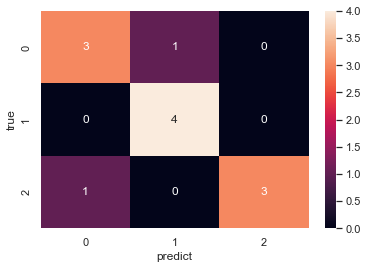

In [104]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sns.set()
f,ax = plt.subplots()
y_true = [0,0,1,2,1,2,0,2,2,0,1,1]
y_pred = [1,0,1,2,1,0,0,2,2,0,1,1]
C2 = confusion_matrix(y_true,y_pred,labels=[0,1,2])
#打印 C2
print(C2)
sns.heatmap(C2,annot=True,ax=ax) #画热力图

#ax.set_titile('confusion matrix') #标题
ax.set_xlabel('predict') #x 轴
ax.set_ylabel('true') #y 轴

[[6874 1473]
 [2262 4018]]


Text(30.5, 0.5, 'true')

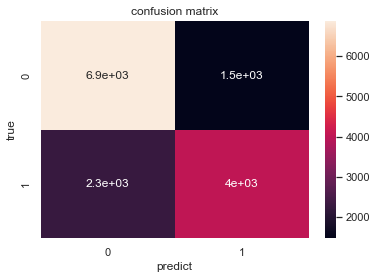

In [112]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sns.set()
f,ax = plt.subplots()

y_true = np.asarray(model_label_pred_label['real_label'])
y_pred = np.asarray(model_label_pred_label['pred_label'])

C2 = confusion_matrix(y_true,y_pred)
print(C2)

# 画热力图
sns.heatmap(C2,annot=True,ax=ax) 
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 

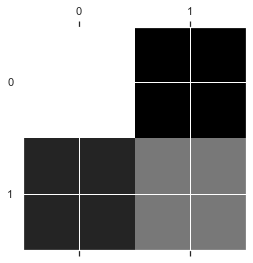

In [106]:
plt.matshow(C2, cmap=plt.cm.gray)